In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
import seaborn as sns

my_data = np.array([[320,0,0.50,100,0.40],
                    [320,20,0.50,100,0.63],
                    [320,40,0.50,100,0.99],
                    [320,80,0.50,100,1.41],
                    [320,0,1,100,0.57],
                    [320,20,1,100,0.95],
                    [320,40,1,100,1.24],
                    [320,60,1,100,1.43],
                    [320,75,1,100,1.55],
                    [320,80,1,100,1.57],
                    [320,0,2,100,0.60],
                    [320,20,2,100,0.96],
                    [320,40,2,100,1.16],
                    [320,60,2,100,1.27],
                    [320,75,2,100,1.33],
                    [320,80,2,100,1.35],
                    [320,0,3,100,0.56],
                    [320,20,3,100,0.85],
                    [320,40,3,100,0.89],
                    [320,80,3,100,1.06],
                    [320,0,5,100,0.48],
                    [320,20,5,100,0.63],
                    [320,40,5,100,0.63],
                    [320,80,5,100,0.69],
                    [280,80,1,100,0.56],
                    [320,80,1,100,1.57],
                    [340,80,1,100,1.63],
                    [360,80,1,100,1.55],
                    [400,80,1,100,1.28],
                    [280,80,1,200,0.31],
                    [300,80,1,200,0.77],
                    [320,80,1,200,1.16],
                    [340,80,1,200,1.36],
                    [360,80,1,200,1.39],
                    [380,80,1,200,1.30],
                    [400,80,1,200,1.12],
                    [280,80,1,250,0.27],
                    [320,80,1,250,1.02],
                    [340,80,1,250,1.21],
                    [360,80,1,250,1.25],
                    [400,80,1,250,1.06],
                    [280,80,1,50,1.22],
                    [320,80,1,50,1.89],
                    [340,80,1,50,1.75],
                    [360,80,1,50,1.63],
                    [400,80,1,50,1.35]])


my_column_names = ['Temperature(C)','Pressure(psig)','H2 to N2 ratio','Flow rate(ml/g)','Ammonia Concentration(%)']
Ammonia_data = pd.DataFrame(data=my_data, columns=my_column_names)
#print(Ammonia_data.describe())

# Data spliting into train and test
X = Ammonia_data.drop(columns=['Ammonia Concentration(%)'])
y = Ammonia_data['Ammonia Concentration(%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70, random_state = 4)

# Model fitting and Prediction
Model = SVR(kernel = 'poly', gamma = 'auto', C = 2)
Model.fit(X_train, y_train)
Prediction = Model.predict(X_test)
Results = pd.DataFrame({'Actual Ammonia Concentration(%)': y_test, 'Predicted Ammonia Concentration(%)': Prediction})
print(Results)

# Performance Check
MAE = mean_absolute_error(y_test, Prediction)
MSE = mean_squared_error(y_test, Prediction)
RMSE = np.sqrt(MSE)

print(f'Mean Absoulte Error: {MAE:.2f}')
print(f'Mean Squared Error: {MSE:.2f}')
print(f'Root Mean Squared Error: {RMSE:.2f}')

    Actual Ammonia Concentration(%)  Predicted Ammonia Concentration(%)
32                             1.36                        5.786962e+05
45                             1.35                        5.583487e+07
4                              0.57                       -1.393072e+06
15                             1.35                        1.474279e+06
38                             1.21                        1.578240e+06
20                             0.48                       -5.156804e+06
16                             0.56                       -3.230331e+06
7                              1.43                       -4.389707e+06
18                             0.89                       -4.628485e+06
11                             0.96                       -2.066466e+06
22                             0.63                       -5.487284e+06
37                             1.02                        8.782476e+05
12                             1.16                       -4.232

# Four commonly used kernel functions in SVR:

Linear kernel: This is the simplest kernel function, and it performs a linear transformation of the input data. It is suitable for linearly separable data.

Polynomial kernel: This kernel function transforms the input data into a higher-dimensional space using a polynomial function. It is suitable for non-linear data with polynomial relationships.

Radial Basis Function (RBF) kernel: This kernel function transforms the input data into an infinite-dimensional space using a Gaussian function. It is suitable for non-linear data with complex relationships.

Sigmoid kernel: This kernel function transforms the input data using a sigmoid function. It is suitable for non-linear data with a sigmoidal relationship.

When choosing a kernel function for SVR, it is important to consider the complexity of the data and the type of relationships between the input and output variables. The optimal kernel function and its hyperparameters can be selected through a process of hyperparameter tuning using cross-validation techniques.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

my_data = np.array([[320,0,0.50,100,0.40],
                    [320,20,0.50,100,0.63],
                    [320,40,0.50,100,0.99],
                    [320,80,0.50,100,1.41],
                    [320,0,1,100,0.57],
                    [320,20,1,100,0.95],
                    [320,40,1,100,1.24],
                    [320,60,1,100,1.43],
                    [320,75,1,100,1.55],
                    [320,80,1,100,1.57],
                    [320,0,2,100,0.60],
                    [320,20,2,100,0.96],
                    [320,40,2,100,1.16],
                    [320,60,2,100,1.27],
                    [320,75,2,100,1.33],
                    [320,80,2,100,1.35],
                    [320,0,3,100,0.56],
                    [320,20,3,100,0.85],
                    [320,40,3,100,0.89],
                    [320,80,3,100,1.06],
                    [320,0,5,100,0.48],
                    [320,20,5,100,0.63],
                    [320,40,5,100,0.63],
                    [320,80,5,100,0.69],
                    [280,80,1,100,0.56],
                    [320,80,1,100,1.57],
                    [340,80,1,100,1.63],
                    [360,80,1,100,1.55],
                    [400,80,1,100,1.28],
                    [280,80,1,200,0.31],
                    [300,80,1,200,0.77],
                    [320,80,1,200,1.16],
                    [340,80,1,200,1.36],
                    [360,80,1,200,1.39],
                    [380,80,1,200,1.30],
                    [400,80,1,200,1.12],
                    [280,80,1,250,0.27],
                    [320,80,1,250,1.02],
                    [340,80,1,250,1.21],
                    [360,80,1,250,1.25],
                    [400,80,1,250,1.06],
                    [280,80,1,50,1.22],
                    [320,80,1,50,1.89],
                    [340,80,1,50,1.75],
                    [360,80,1,50,1.63],
                    [400,80,1,50,1.35]])


my_column_names = ['Temperature(C)','Pressure(psig)','H2 to N2 ratio','Flow rate(ml/g)','Ammonia Concentration(%)']
Ammonia_data = pd.DataFrame(data=my_data, columns=my_column_names)
#print(Ammonia_data.describe())

# Data spliting into train and test
X = Ammonia_data.drop(columns=['Ammonia Concentration(%)'])
y = Ammonia_data['Ammonia Concentration(%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 4)


# Define the hyperparameter grid to search
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear','rbf']}

# Creating SVR model
model = SVR()


# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Evaluate the model using the best hyperparameters on the testing set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
Results = pd.DataFrame({'Actual Ammonia Concentration(%)': y_test, 'Predicted Ammonia Concentration(%)': y_pred})
# print(Results)

# Performance Check
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

# print(f'Mean Absoulte Error: {MAE:.2f}')
# print(f'Mean Squared Error: {MSE:.2f}')
# print(f'Root Mean Squared Error: {RMSE:.2f}')
# print(X_test)

# nP, nF = (3, 2)
# P = np.arange(0, 80, nP)
# F = np.arange(1, 5, nF)
# Pm, Fm = np.meshgrid(P, F)


# X_grid = np.array([[320,Pm[i],Fm[j],100]])



# y_grid = best_model.predict(X_grid)
# print(y_grid)

Best Hyperparameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


# param_grid: This is a dictionary that contains the hyperparameters to search over using grid search.

'C': [0.1, 1, 10]: C is the regularization parameter of the SVM model, and it controls the trade-off between achieving a low training error and a low testing error. A smaller value of C will result in a wider margin and more margin violations, while a larger value of C will result in a narrower margin and fewer margin violations. The values [0.1, 1, 10] specify the range of C values to search over.

'gamma': ['scale', 'auto']: gamma is the kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels, and it controls the shape of the decision boundary. The values ['scale', 'auto'] specify the range of gamma values to search over.

'kernel': ['linear', 'rbf', 'poly']: kernel specifies the type of kernel function to be used in the SVM model. The values ['linear', 'rbf', 'poly'] specify the range of kernel types to search over.

Best Hyperparameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
[[320, 0, 0.5, 100], [320, 0, 0.75, 100], [320, 0, 1.0, 100], [320, 0, 1.25, 100], [320, 0, 1.5, 100], [320, 0, 1.75, 100], [320, 0, 2.0, 100], [320, 0, 2.25, 100], [320, 0, 2.5, 100], [320, 0, 2.75, 100], [320, 0, 3.0, 100], [320, 0, 3.25, 100], [320, 0, 3.5, 100], [320, 0, 3.75, 100], [320, 0, 4.0, 100], [320, 0, 4.25, 100], [320, 0, 4.5, 100], [320, 0, 4.75, 100], [320, 0, 5.0, 100], [320, 5, 0.5, 100], [320, 5, 0.75, 100], [320, 5, 1.0, 100], [320, 5, 1.25, 100], [320, 5, 1.5, 100], [320, 5, 1.75, 100], [320, 5, 2.0, 100], [320, 5, 2.25, 100], [320, 5, 2.5, 100], [320, 5, 2.75, 100], [320, 5, 3.0, 100], [320, 5, 3.25, 100], [320, 5, 3.5, 100], [320, 5, 3.75, 100], [320, 5, 4.0, 100], [320, 5, 4.25, 100], [320, 5, 4.5, 100], [320, 5, 4.75, 100], [320, 5, 5.0, 100], [320, 10, 0.5, 100], [320, 10, 0.75, 100], [320, 10, 1.0, 100], [320, 10, 1.25, 100], [320, 10, 1.5, 100], [320, 10, 1.75, 100], [320, 10, 2.0, 100], [32

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


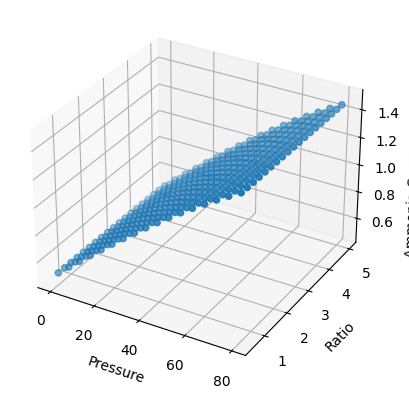

[1.47119781] [1.45348476]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

my_data = np.array([[320,0,0.50,100,0.40],
                    [320,20,0.50,100,0.63],
                    [320,40,0.50,100,0.99],
                    [320,80,0.50,100,1.41],
                    [320,0,1,100,0.57],
                    [320,20,1,100,0.95],
                    [320,40,1,100,1.24],
                    [320,60,1,100,1.43],
                    [320,75,1,100,1.55],
                    [320,80,1,100,1.57],
                    [320,0,2,100,0.60],
                    [320,20,2,100,0.96],
                    [320,40,2,100,1.16],
                    [320,60,2,100,1.27],
                    [320,75,2,100,1.33],
                    [320,80,2,100,1.35],
                    [320,0,3,100,0.56],
                    [320,20,3,100,0.85],
                    [320,40,3,100,0.89],
                    [320,80,3,100,1.06],
                    [320,0,5,100,0.48],
                    [320,20,5,100,0.63],
                    [320,40,5,100,0.63],
                    [320,80,5,100,0.69],
                    [280,80,1,100,0.56],
                    [320,80,1,100,1.57],
                    [340,80,1,100,1.63],
                    [360,80,1,100,1.55],
                    [400,80,1,100,1.28],
                    [280,80,1,200,0.31],
                    [300,80,1,200,0.77],
                    [320,80,1,200,1.16],
                    [340,80,1,200,1.36],
                    [360,80,1,200,1.39],
                    [380,80,1,200,1.30],
                    [400,80,1,200,1.12],
                    [280,80,1,250,0.27],
                    [320,80,1,250,1.02],
                    [340,80,1,250,1.21],
                    [360,80,1,250,1.25],
                    [400,80,1,250,1.06],
                    [280,80,1,50,1.22],
                    [320,80,1,50,1.89],
                    [340,80,1,50,1.75],
                    [360,80,1,50,1.63],
                    [400,80,1,50,1.35]])


my_column_names = ['Temperature(C)','Pressure(psig)','H2 to N2 ratio','Flow rate(ml/g)','Ammonia Concentration(%)']
Ammonia_data = pd.DataFrame(data=my_data, columns=my_column_names)
#print(Ammonia_data.describe())

# Data spliting into train and test
X = Ammonia_data.drop(columns=['Ammonia Concentration(%)'])
y = Ammonia_data['Ammonia Concentration(%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 4)


# Define the hyperparameter grid to search
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear','rbf']}

# Creating SVR model
model = SVR()


# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Evaluate the model using the best hyperparameters on the testing set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Creating array for 3D plotting
Temperature = 320
Gas_flow_rate = 100

# pressure range with an increment of 5
Pressure_range = range(0, 81, 5)

# ratio range with an increment of 0.25
Ratio_range = [0.5 + i * 0.25 for i in range(19)]

Combined_array = []

for Pressure in Pressure_range:
    for Ratio in Ratio_range:
        Combined_array.append([Temperature, Pressure, Ratio, Gas_flow_rate])

print(Combined_array)

z_pred = best_model.predict(Combined_array)
print(z_pred)

# Extract pressure, ratio, and temperature from result_array
pressure = [row[1] for row in Combined_array]
ratio = [row[2] for row in Combined_array]

# Create figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
ax.scatter(pressure, ratio, z_pred)

# Set axis labels
ax.set_xlabel('Pressure')
ax.set_ylabel('Ratio')
ax.set_zlabel('Ammonia Concentration(%)')

# Show plot
plt.show()


Best Hyperparameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



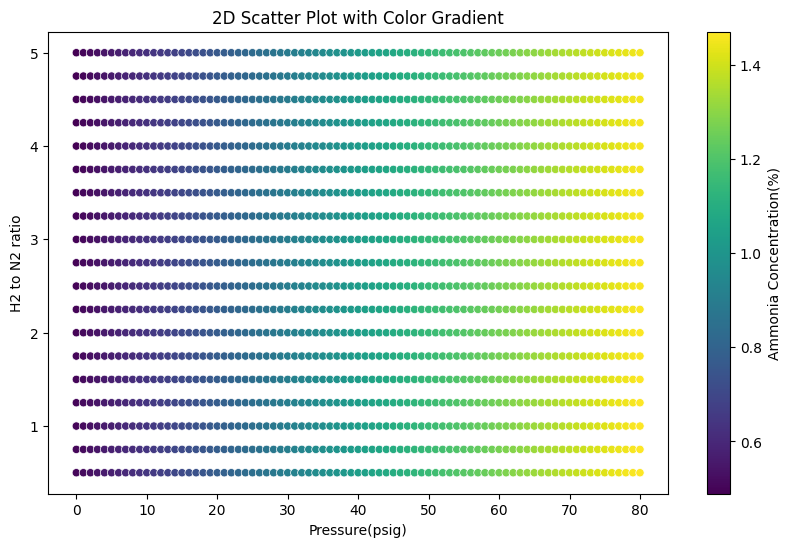

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Data
my_data = np.array([[320,0,0.50,100,0.40],
                    [320,20,0.50,100,0.63],
                    [320,40,0.50,100,0.99],
                    [320,80,0.50,100,1.41],
                    [320,0,1,100,0.57],
                    [320,20,1,100,0.95],
                    [320,40,1,100,1.24],
                    [320,60,1,100,1.43],
                    [320,75,1,100,1.55],
                    [320,80,1,100,1.57],
                    [320,0,2,100,0.60],
                    [320,20,2,100,0.96],
                    [320,40,2,100,1.16],
                    [320,60,2,100,1.27],
                    [320,75,2,100,1.33],
                    [320,80,2,100,1.35],
                    [320,0,3,100,0.56],
                    [320,20,3,100,0.85],
                    [320,40,3,100,0.89],
                    [320,80,3,100,1.06],
                    [320,0,5,100,0.48],
                    [320,20,5,100,0.63],
                    [320,40,5,100,0.63],
                    [320,80,5,100,0.69],
                    [280,80,1,100,0.56],
                    [320,80,1,100,1.57],
                    [340,80,1,100,1.63],
                    [360,80,1,100,1.55],
                    [400,80,1,100,1.28],
                    [280,80,1,200,0.31],
                    [300,80,1,200,0.77],
                    [320,80,1,200,1.16],
                    [340,80,1,200,1.36],
                    [360,80,1,200,1.39],
                    [380,80,1,200,1.30],
                    [400,80,1,200,1.12],
                    [280,80,1,250,0.27],
                    [320,80,1,250,1.02],
                    [340,80,1,250,1.21],
                    [360,80,1,250,1.25],
                    [400,80,1,250,1.06],
                    [280,80,1,50,1.22],
                    [320,80,1,50,1.89],
                    [340,80,1,50,1.75],
                    [360,80,1,50,1.63],
                    [400,80,1,50,1.35]])

my_column_names = ['Temperature(C)', 'Pressure(psig)', 'H2 to N2 ratio', 'Flow rate(ml/g)', 'Ammonia Concentration(%)']
Ammonia_data = pd.DataFrame(data=my_data, columns=my_column_names)

# Data spliting into train and test
X = Ammonia_data.drop(columns=['Ammonia Concentration(%)'])
y = Ammonia_data['Ammonia Concentration(%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

# Define the hyperparameter grid to search
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear','rbf']}

# Creating SVR model
model = SVR()

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Evaluate the model using the best hyperparameters on the testing set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Create array for 3D plotting
Temperature = 320
Gas_flow_rate = 100
Pressure_range = range(0, 81, 1)
Ratio_range = [0.5 + i * 0.25 for i in range(19)]

Combined_array = []

for Pressure in Pressure_range:
    for Ratio in Ratio_range:
        Combined_array.append([Temperature, Pressure, Ratio, Gas_flow_rate])

# Predict ammonia concentrations for combined array
z_pred = best_model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[1] for row in Combined_array]
ratio = [row[2] for row in Combined_array]

# Reshape z_pred to match the shape of pressure and ratio
z_pred_reshaped = np.array(z_pred).reshape(len(Pressure_range), len(Ratio_range))


import plotly.graph_objects as go

# Create scatter plot with color gradient
plt.figure(figsize=(10, 6))
sc = plt.scatter(pressure, ratio, c=z_pred_reshaped, cmap='viridis', edgecolors='w', linewidths=0.5)

# Add colorbar
plt.colorbar(sc, label='Ammonia Concentration(%)')

# Set labels and title
plt.xlabel('Pressure(psig)')
plt.ylabel('H2 to N2 ratio')
plt.title('2D Scatter Plot with Color Gradient')

# Show plot
plt.show()
